# Logistic Regression

# y -> Whether the client has subscribed a term deposit or not 
# Binomial ("yes" or "no")

In [134]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt  

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report 

In [137]:
# import data 
data = pd.read_csv('bank-full.csv',sep = ';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [138]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [139]:
 #labeling features
data1=data.copy()
for i, column in enumerate(data1.columns, 1):
  if data[column].dtype!='object':
    continue
  label_encoder=preprocessing.LabelEncoder()
  data1[column]=label_encoder.fit_transform(data1[column])

In [140]:
data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


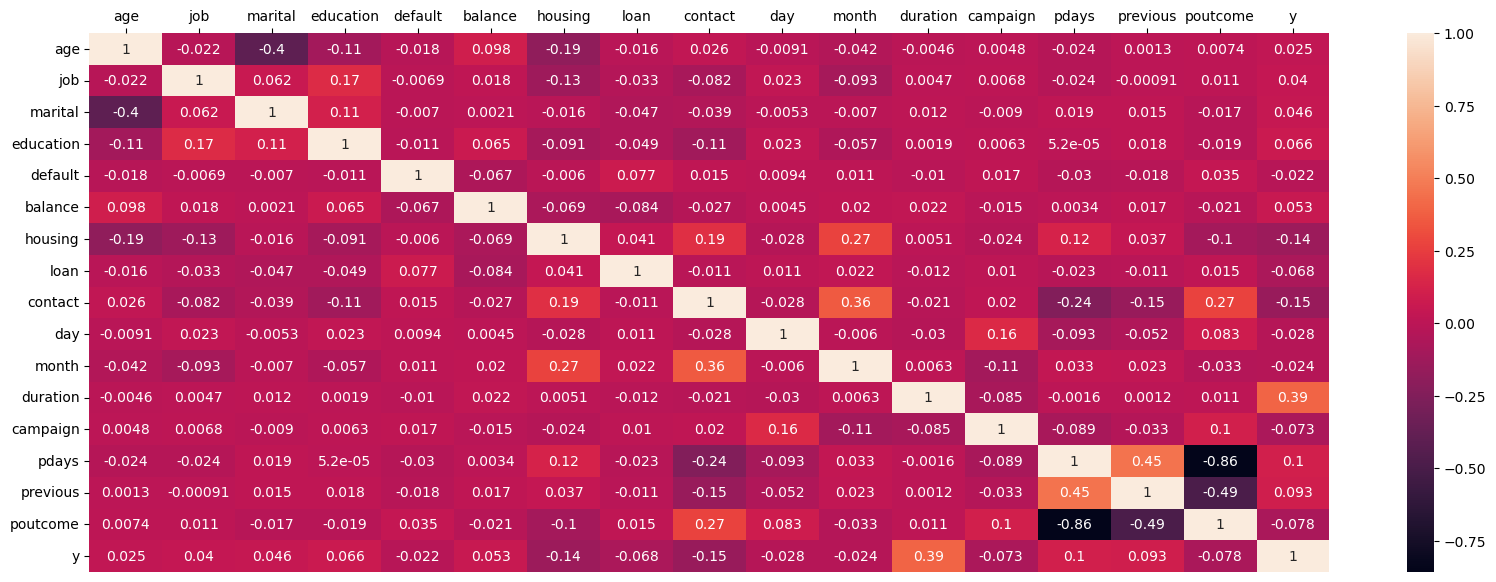

In [141]:
#plotting the heatmap for correlation
plt.figure(figsize=(20,7))
ax = sb.heatmap(data1.corr(), annot=True)
ax.xaxis.tick_top()

/Users/prudhvipaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prudhvipaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prudhvipaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

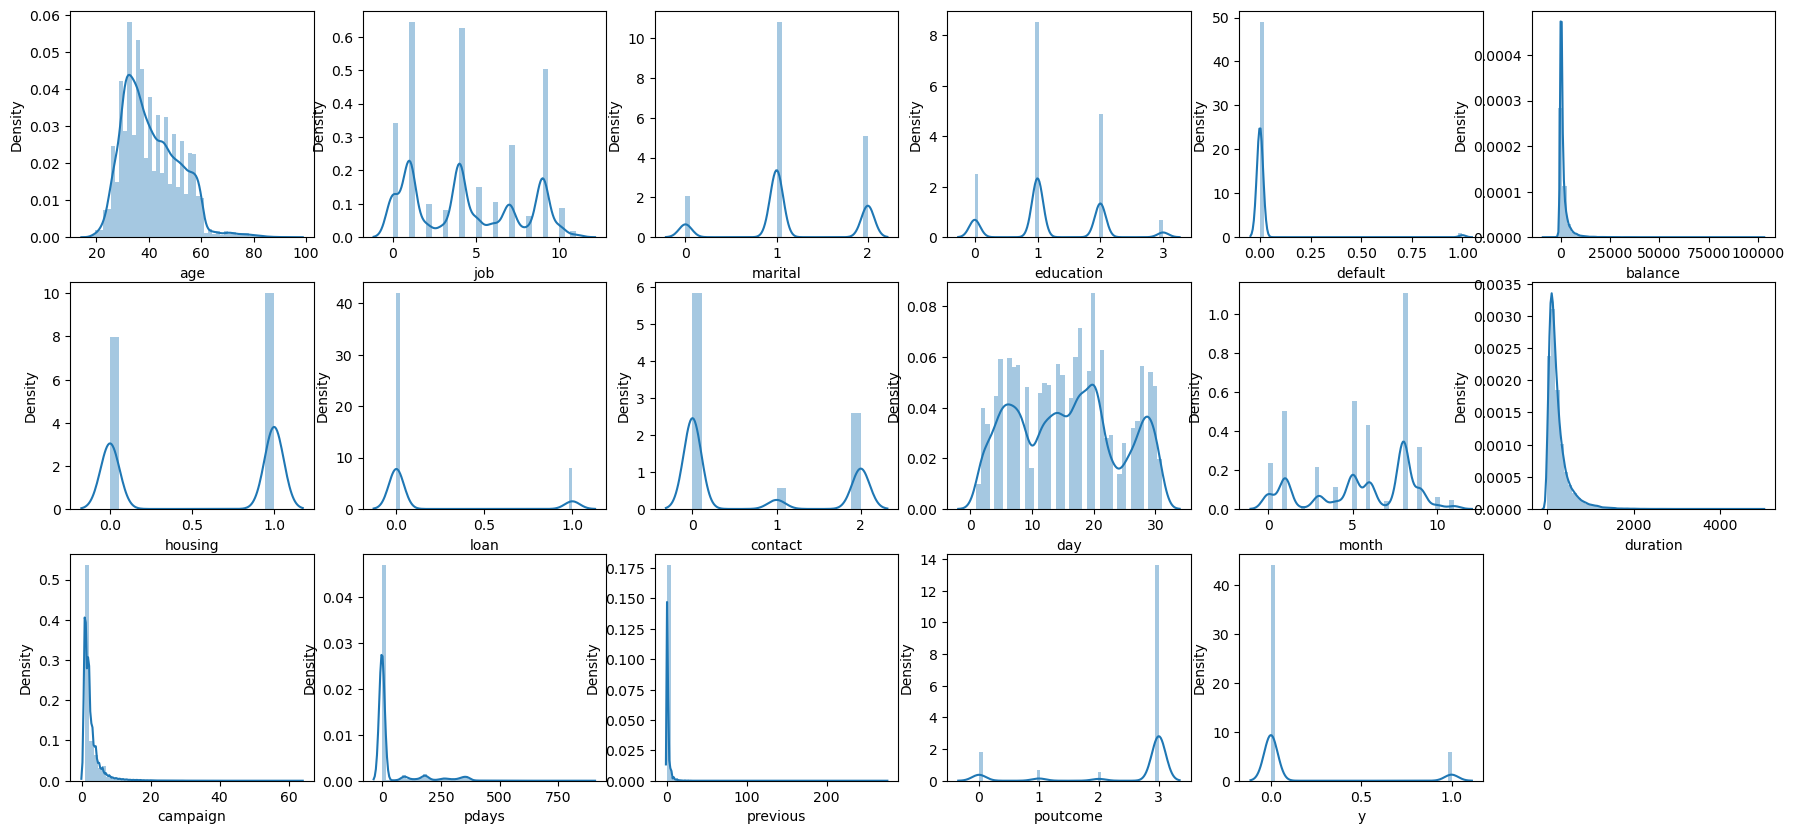

In [142]:
#plotting distplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(data1.columns, 1):
    plt.subplot(3,6,i)
    sb.distplot(data1[column])

In [143]:
data1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Original Model

In [146]:
# logistic regression and fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

/Users/prudhvipaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
# y prediction on x
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [148]:
y_pred_df=pd.DataFrame({'actual':Y, 'predicted_prob':y_pred})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [149]:
#confusion matrix for the model accuracy
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix1)

[[7841  152]
 [ 864  186]]


In [150]:
# ROC Curve
classifier.predict_proba(X)

array([[0.94853552, 0.05146448],
       [0.94888703, 0.05111297],
       [0.94696402, 0.05303598],
       ...,
       [0.67207721, 0.32792279],
       [0.94034792, 0.05965208],
       [0.58211163, 0.41788837]])

In [151]:
classifier.predict_proba(X).shape

(45211, 2)

In [152]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thersholds=roc_curve(Y,classifier.predict_proba(X)[:,1])


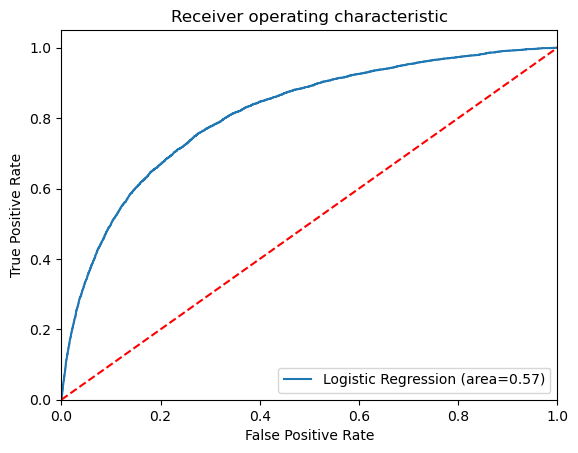

In [153]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [154]:
auc=roc_auc_score(Y,y_pred)
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score  

0.5723967867991099

In [155]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", np.round(accuracy_score(Y, y_pred)*100),'%')

Accuracy :  89.0 %


# Model Building

In [157]:
X=data1.iloc[:,0:16]
Y=data1.iloc[:,16]

# Train & Test

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=1)

In [159]:
# logistic regression and fitting
classifier1 = LogisticRegression()
classifier1.fit(X_train,Y_train)

/Users/prudhvipaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [160]:
# y prediction on x
y_pred1=classifier1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
y_pred_df1=pd.DataFrame({'actual':Y_test, 'predicted_prob':y_pred1})
y_pred_df1

,actual,predicted_prob
3610,0,0
11677,0,0
33018,0,0
44323,1,0
8119,0,0
...,...,...
22959,0,0
26059,0,0
18593,0,0
6959,0,0


# confusion matrix 

In [161]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix1=confusion_matrix(Y_test,y_pred1)
print(confusion_matrix1)

[[7841  152]
 [ 864  186]]


In [162]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.55      0.18      0.27      1050

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



# ROC Curve

In [163]:
classifier1.predict_proba(X)

array([[0.94402054, 0.05597946],
       [0.95030169, 0.04969831],
       [0.95367579, 0.04632421],
       ...,
       [0.5990667 , 0.4009333 ],
       [0.94271551, 0.05728449],
       [0.54254631, 0.45745369]])

In [164]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y_test, y_pred1)*100,'%')

Accuracy :  88.76479044564857 %


# Model Validation with KFold method

In [165]:
#cross validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [166]:
# dv and iv
x=data1.iloc[:,0:16]
y=data1.iloc[:,16]
kfold = KFold(n_splits=3)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv=kfold)

/Users/prudhvipaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/prudhvipaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [168]:
results.mean()*100

88.208451389516

In [169]:
import statsmodels.api as sm 

In [170]:
logit = sm.Logit(Y, y_pred)  

In [171]:
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: 0.692826
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45210
Method:                           MLE   Df Model:                            0
Date:                Tue, 12 Sep 2023   Pseudo R-squ.:                 -0.9199
Time:                        00:14:15   Log-Likelihood:                -31323.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2803      0.052      5.364      0.000       0.178       0.383
==============================================================================
"""

In [172]:
fpr 

array([0.00000000e+00, 2.50488452e-05, 1.00195381e-04, ...,
       9.97795702e-01, 9.97795702e-01, 1.00000000e+00])

In [173]:
tpr 

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [174]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba(X)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls  

,thresholds,accuracy
816,4.847972e-01,0.887793
815,4.848229e-01,0.887771
817,4.847400e-01,0.887771
813,4.852850e-01,0.887771
812,4.856724e-01,0.887749
...,...,...
7772,4.630204e-04,0.122824
7773,4.614885e-04,0.122802
7774,5.660962e-05,0.118931
7775,5.458482e-05,0.118909


In [175]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.118084


In [176]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.118084


In [177]:
threshold = 0.525080
preds = np.where(classifier.predict_proba(X)[:,1] > threshold, 1, 0)
print(classification_report(Y,preds))  

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.58      0.15      0.24      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



# Conclusion
  
  Accuracy is almost 89%